In [1]:
import pandas as pd


In [7]:
houses = pd.read_table("AmesHousing_1.txt")

In [8]:
houses["SalePrice"].head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

#### 1.  Create the `house_per_year` dataset

In [10]:
houses_per_year = pd.DataFrame()
houses_per_year['Year'] = ['2006', '2007', '2008', '2009', '2010']
houses_per_year['Mean Price'] = [181761.648000, 185138.207493, 178841.750804, 181404.567901, 172597.598240]
houses_per_year['Houses Sold'] = [625, 694, 622, 648, 341]

In [11]:
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [13]:
mean_new = houses_per_year['Mean Price'].mean()
mean_original = houses['SalePrice'].mean()
difference = mean_original - mean_new
difference

847.3055806593911

### 2. Different Weights

In [14]:
houses_per_year['sum_per_year'] = houses_per_year['Mean Price'] * houses_per_year['Houses Sold']
all_sums_together = houses_per_year['sum_per_year'].sum()
total_n_houses = houses_per_year['Houses Sold'].sum()
weighted_mean = all_sums_together / total_n_houses

mean_original = houses['SalePrice'].mean()

difference = round(mean_original, 10) - round(weighted_mean, 10)
difference

2.7997884899377823e-08

### 3. The Weighted Mean


The `zip()` function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

In [ ]:
def weighted_mean(distribution, weights):
    weighted_sum = []
    
    for mean, weight in zip(distribution, weights):
        weighted_sum.append(mean * weight)
    
    return sum(weighted_sum) / sum(weights)

weighted_mean_function = weighted_mean(houses_per_year['Mean Price'],
                                       houses_per_year['Houses Sold'])

from numpy import average
weighted_mean_numpy = average(houses_per_year['Mean Price'],
        weights = houses_per_year['Houses Sold'])

equal = round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10)

### 4. The Median for Open-ended Distributions

The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the TotRms AbvGrd variable has an **open-ended distribution**.
It's still reasonable to want to find an average value (a single representative value) for this distribution, but "10 or more" is not numerical, which makes it impossible to compute the mean. Remember that the definition of the mean is $\frac{\displaystyle\sum_{i = 1}^{n}x_i}{n}$, so we can't compute the $\displaystyle\sum_{i = 1}^{n}x_i$. part because of the "10 or more" value.
A common workaround is to sort all the values in the distribution in an ascending order and then select the middle value as the most representative value of the distribution. Consider this sample of 5 values from the TomRms AbvGrd column:
\begin{equation}
[10\ or\ more,\ 5,\ 7,\ 7,\ 6]
\end{equation}
First, we need to order the values in an ascending order:
\begin{equation}
[5,\ 6,\ 7,\ 7,\ 10\ or\ more]
\end{equation}
This distribution has five values and the middle one is the third one because it divides the distribution in two halves of equal length. The third value is 7, and the two resulting halves are`[5,6]` and `[7,10, more]`. We call this middle value the **median**, so for this case the median is 7.
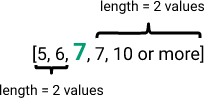
Let's practice computing medians for a few distributions before finding the median of the `TotRms AbvGrd` above.

In [15]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

median1 = 23
median2 = 55
median3 = 32

### 5. Distributions with Even Number of Values
When a distribution has an even number of values, it's not clear which is the middle one. Consider this sorted distribution with 6 values:
\begin{equation}
[5,\ 6,\ 7,\ 7,\ 8,\ 10\ or\ more]
\end{equation}
It's impossible to choose a value from this distribution that divides the distribution in two halves of equal length. The workaround is to take the two middle values and compute their mean. The two middle values are`[7,7]` and the two resulting halves are:`[5,6]` and `[8,10 or more]`.
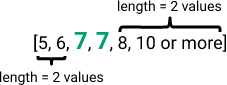
The median is the mean of the two middle values, that is $\frac{7 + 7}{2} = 7$
This value of 7 is the average value of the distribution above. In statistics, **the term "average" refers to the most representative value of a distribution**. 

In [17]:
# Sort the values
rooms = houses['TotRms AbvGrd'].copy()
rooms = rooms.replace({'10 or more': 10})
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values()

# Find the median
middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] # len - 1 and len because Series use 0-indexing 
middle_values = rooms_sorted.iloc[middle_indices] # make sure you don't use loc[]
median = middle_values.mean()
median

6.0

### 6. The Median as a Resistant Statistic
When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values).

This property makes the median more resistant to changes in the data compared to the mean. Let's consider this simple distribution:
\begin{equation}
[2, 3, 5, 5, 10]
\end{equation}
Both the median and the mean of this distribution are 5. Let's change the last value in the distribution from 10 to 1000:
\begin{equation}
[2, 3, 5, 5, 1000]
\end{equation}
The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the median is so resistant to changes in the data, it's classified as a **resistant or robust statistic**.

**This property makes the median ideal for finding reasonable averages for distributions containing outliers**. 

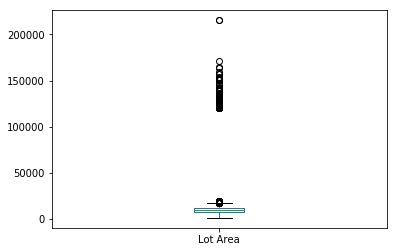

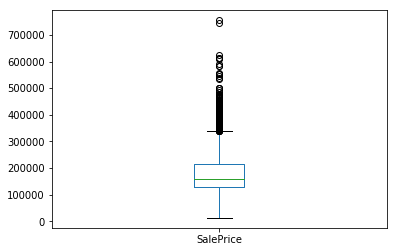

In [9]:
import matplotlib.pyplot as plt

houses['Lot Area'].plot.box()
plt.show()
houses['SalePrice'].plot.box()
plt.show()

lotarea_difference = houses['Lot Area'].mean() - houses['Lot Area'].median()
saleprice_difference = houses['SalePrice'].mean() - houses['SalePrice'].median()

### 7. The Median for Ordinal Scales

In [18]:
print(houses['Overall Cond'].value_counts().sort_index())

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64


In [19]:
mean = houses['Overall Cond'].mean()
median = houses['Overall Cond'].median()
mean
m

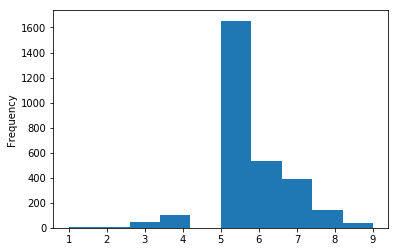

In [20]:
houses['Overall Cond'].plot.hist()

The mean seems more representative and more informative because it captures the
fact that there are more houses rated above 5 than rated under 5. Because of this,
the mean is slightly shifted above 5. So more_representative is 'mean'